<a href="https://colab.research.google.com/github/VEHEMENT2003/Machinelearnig/blob/main/AI_PROCESSOR_AND_ARCHITECTURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Implement a perceptron algorithm to classify a small dataset of points into two categories.

import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

# Sample data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # Example: classifying points where both are 1

# Create and train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X, y)

# Make predictions
predictions = perceptron.predict(X)
print("Predictions:", predictions)


Predictions: [0 0 0 1]


Predictions: [1 1 1 1]
Final weights: [0. 0.]
Final bias: 0.0


<ipython-input-3-4e537fa854db>:52: RuntimeWarning: invalid value encountered in divide
  y_vals = -(weights[0] * x_vals + bias) / weights[1]


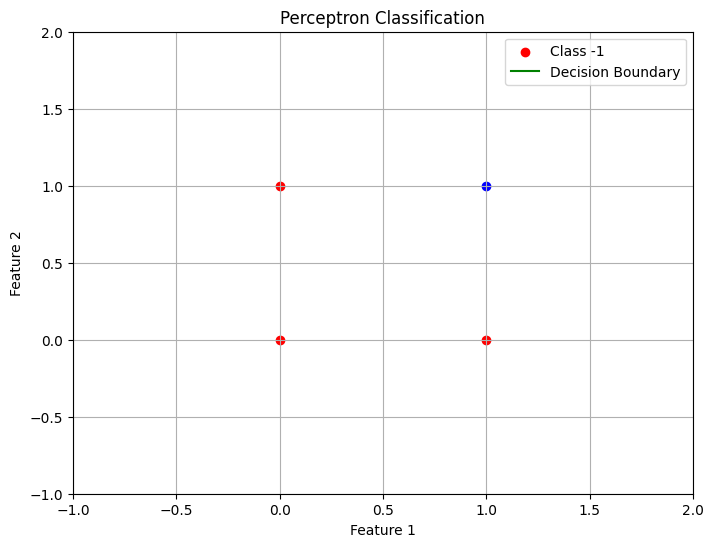

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the dataset
# Points in 2D space and their labels (1 or -1)
X = np.array([
    [2, 3],
    [1, 1],
    [5, 4],
    [6, 2],
    [1, 4],
    [2, 1]
])
y = np.array([1, 1, -1, -1, 1, -1])  # Labels for the points

# Step 2: Initialize weights and bias
weights = np.zeros(X.shape[1])  # Initialize weights as zeros
bias = 0                        # Initialize bias as zero
learning_rate = 0.1             # Learning rate
epochs = 10                     # Number of epochs

# Step 3: Perceptron training function
def perceptron_train(X, y, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        for i, x in enumerate(X):
            # Calculate the linear combination
            linear_output = np.dot(weights, x) + bias
            # Predict the class (sign function)
            y_pred = 1 if linear_output >= 0 else -1
            # Update weights and bias if there's a misclassification
            if y_pred != y[i]:
                weights += learning_rate * y[i] * x
                bias += learning_rate * y[i]
    return weights, bias

# Train the perceptron
weights, bias = perceptron_train(X, y, weights, bias, learning_rate, epochs)

# Step 4: Define the prediction function
def perceptron_predict(X, weights, bias):
    predictions = []
    for x in X:
        linear_output = np.dot(weights, x) + bias
        predictions.append(1 if linear_output >= 0 else -1)
    return np.array(predictions)

# Step 5: Plot the data and decision boundary
def plot_decision_boundary(X, y, weights, bias):
    plt.figure(figsize=(8, 6))
    for i, x in enumerate(X):
        if y[i] == 1:
            plt.scatter(x[0], x[1], color='blue', label='Class 1' if i == 0 else "")
        else:
            plt.scatter(x[0], x[1], color='red', label='Class -1' if i == 0 else "")
    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_vals = np.linspace(x_min, x_max, 100)
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
    plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Perceptron Classification')
    plt.grid(True)
    plt.show()

# Make predictions and visualize
predictions = perceptron_predict(X, weights, bias)
print("Predictions:", predictions)
print("Final weights:", weights)
print("Final bias:", bias)

plot_decision_boundary(X, y, weights, bias)


In [ ]:
# prompt: Train a simple neural network using backpropagation on a dataset (e.g., MNIST) to recognize digits.

import numpy as np
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 784-dimensional vector
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 digits) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',  # Use the Adam optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Train the model
model.fit(x_train, y_train, epochs=5) # Adjust the number of epochs as needed

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy}")

       0/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8787 - loss: 0.4307
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9643 - loss: 0.1223
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9770 - loss: 0.0780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9839 - loss: 0.0528
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9869 - loss: 0.0417
Test accuracy: 0.9750999808311462


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8611 - loss: 0.4799 - val_accuracy: 0.9553 - val_loss: 0.1591
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9617 - loss: 0.1222 - val_accuracy: 0.9677 - val_loss: 0.1098
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9746 - loss: 0.0809 - val_accuracy: 0.9660 - val_loss: 0.1186
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9827 - loss: 0.0576 - val_accuracy: 0.9667 - val_loss: 0.1081
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9862 - loss: 0.0443 - val_accuracy: 0.9740 - val_loss: 0.0962
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9896 - loss: 0.0330 - val_accuracy: 0.9719 - val_loss: 0.0973
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9913 - loss: 0.0268 - val_accuracy: 0.9694 - val_loss: 0.1178
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9938 - loss: 0.0193 - 

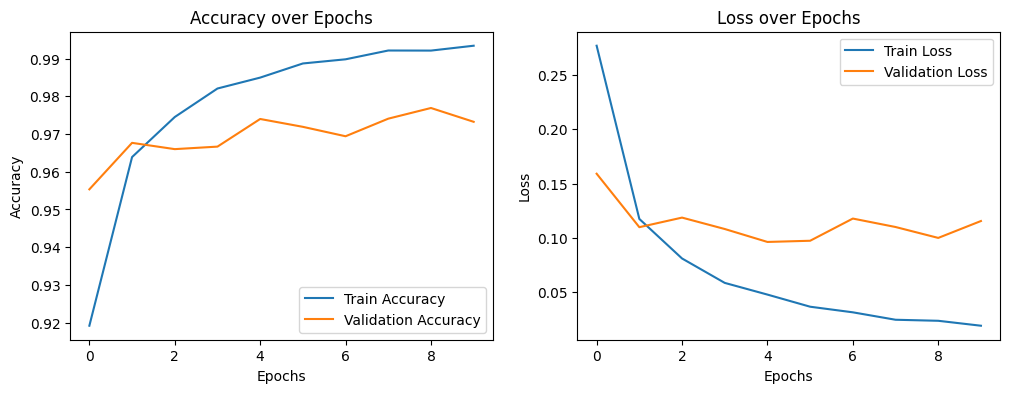

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


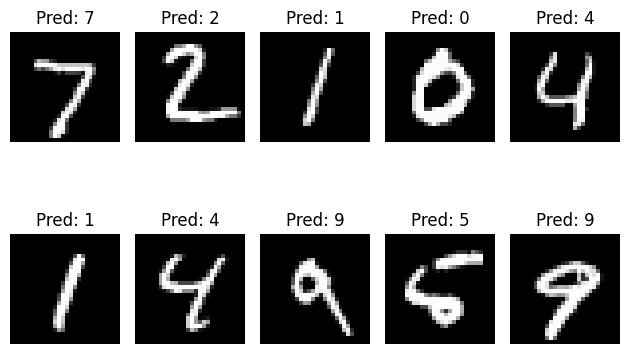

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
X_train = X_train.astype("float32") / 255.0  # Normalize pixel values
X_test = X_test.astype("float32") / 255.0    # Normalize pixel values
y_train = to_categorical(y_train, 10)        # One-hot encode the labels
y_test = to_categorical(y_test, 10)          # One-hot encode the labels

# Step 3: Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dense(64, activation='relu'),   # Fully connected layer with 64 neurons
    Dense(10, activation='softmax') # Output layer for 10 classes
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 7: Visualize training performance
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

# Step 8: Make predictions
predictions = model.predict(X_test[:10])

# Display the first 10 test images and predictions
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {predictions[i].argmax()}")
plt.tight_layout()
plt.show()
